In [3]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

from sklearn.decomposition import PCA

pca = PCA(n_components=50) # 주성분 50개를 뽑아줘
pca.fit(fruits_2d)

PCA(n_components=50)

차원 축소
- 지금까지 우리는 데이터가 가진 속성을 특성이라고 불렀음. 머신러닝에선 이 특성을 차원이라고도 부름
* 다차원 배열ㄹ과 1차원 배열에서 용어가 다르게 쓰임
- 다차원 배열: 차원 = 축의 개수/1차원 배열(벡터): 차원 = 원소의 개수
- 지금 차원 축소에서 축소한다는 차원은 후자(벡터로서의 차원)

차원축소
- 비지도 학습의 한 종류로, 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 다른 알고리즘의 성능을 향상시킬 수 있는 벙법
  - 특성 개수가 많아지면 과대적합되는데, 이를 막아줌
  - 특성 개수가 줄어드니까 당연히 용량도 줄여줌.
  - 시각화하기도 쉬워짐
- 반대로, 줄어든 차원에서 원본 차원으로 복원할 수도 있음.
- 대표적으로 주성분 분석이 있음

In [4]:
print(pca.components_.shape) #찾은 주성분의 크기를 확인해보면 50개의 주성분을 찾았고, 각 주성분들은 원소를 10000개씩 갖고 있음

(50, 10000)


In [5]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

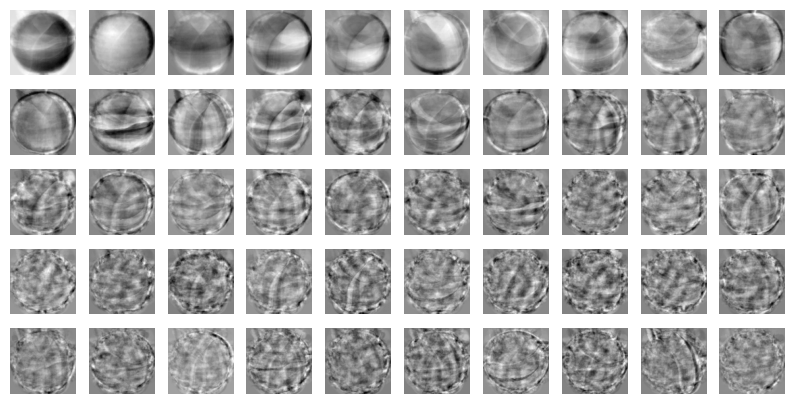

In [6]:
draw_fruits(pca.components_.reshape(-1, 100, 100)) # 주성분도 그림으로 확인해보자!

In [7]:
print(fruits_2d.shape) # 원래 300개의 샘플들 각각에 10000개의 특성이 있는데

(300, 10000)


In [8]:
fruits_pca = pca.transform(fruits_2d) # 주성분으로 "차원축소"하고 나면
print(fruits_pca.shape) # 특성 개수가 50개로 줄어듦

(300, 50)


In [9]:
fruits_inverse = pca.inverse_transform(fruits_pca) # (300, 50)의 배열을 다시 복원하니
print(fruits_inverse.shape) # 특성이 10000개로 늘어남

(300, 10000)


In [10]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

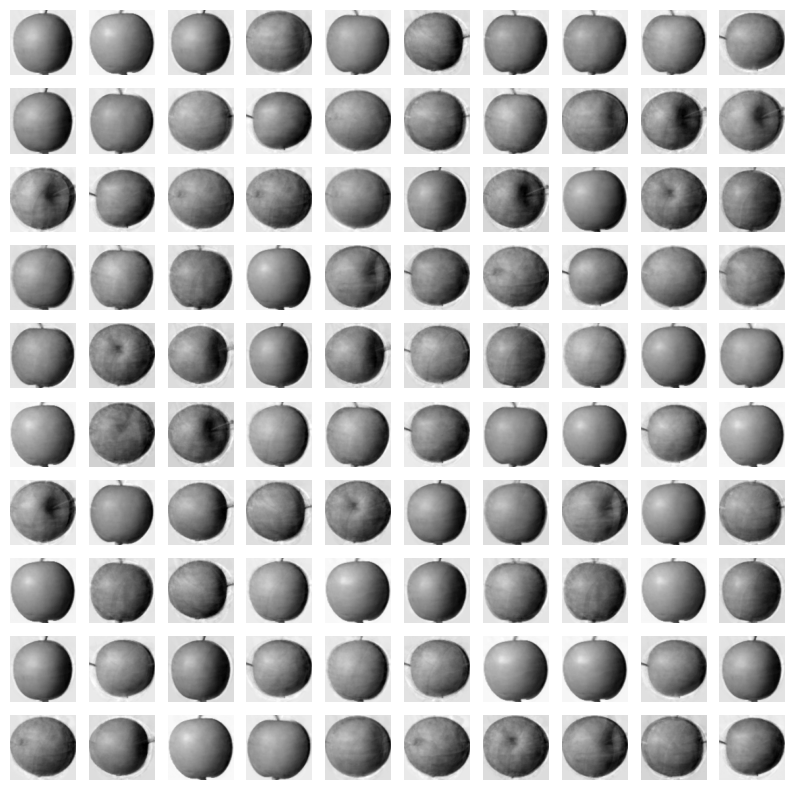

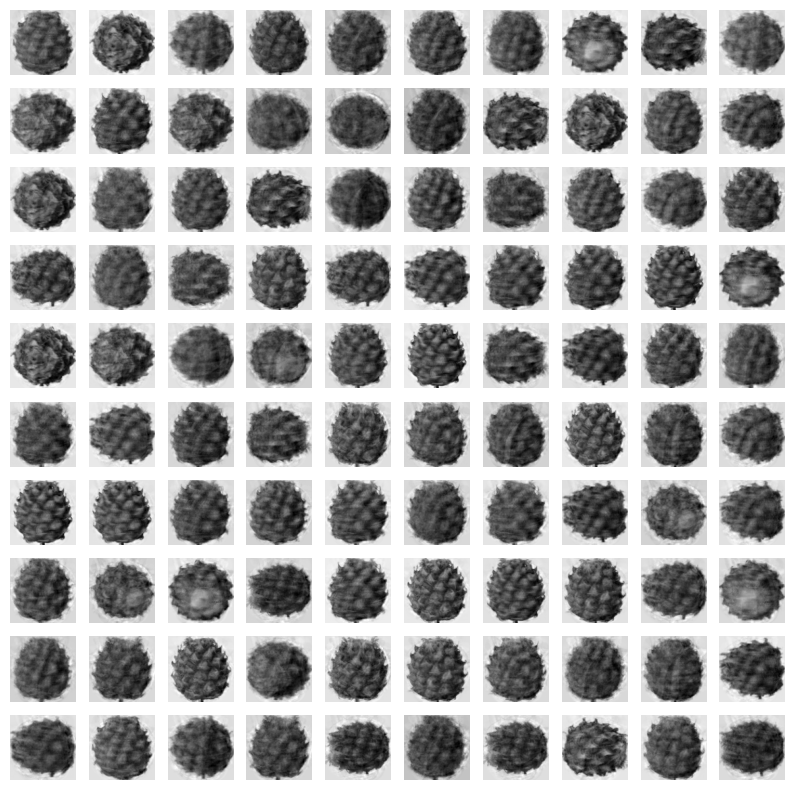

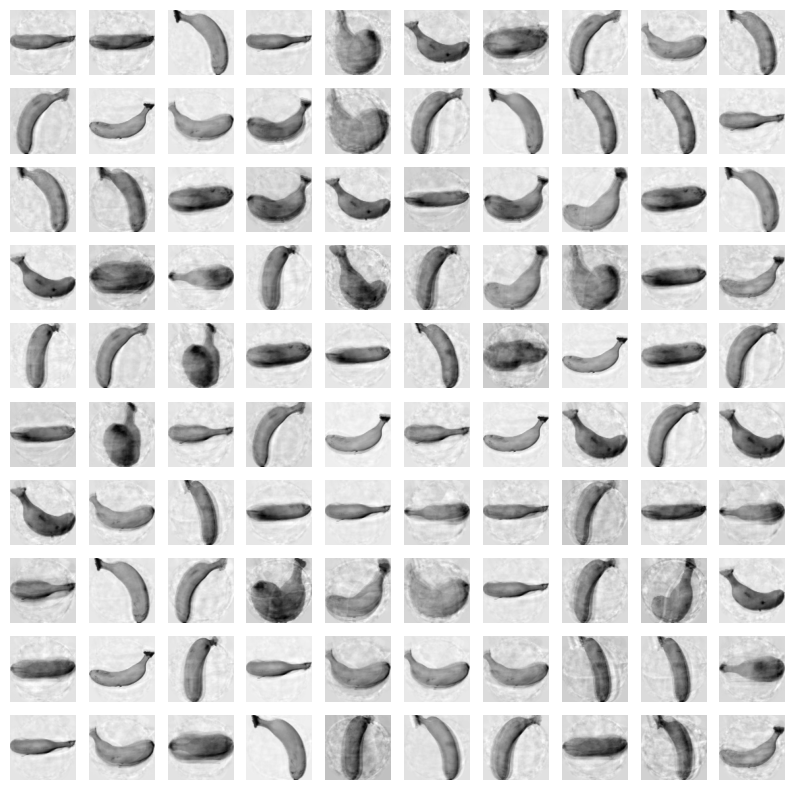

In [11]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

In [12]:
print(np.sum(pca.explained_variance_ratio_))

0.9215749363632231


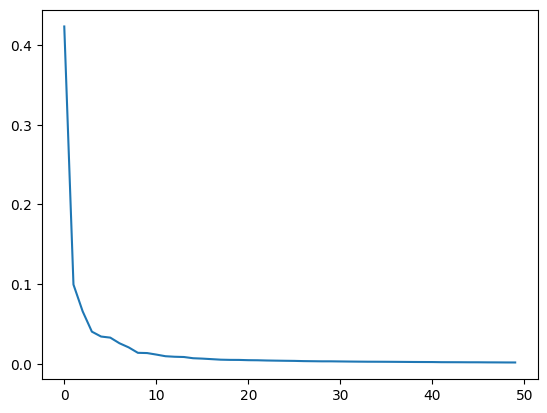

In [13]:
# 50개의 주성분들이 각각 원본의 분산을 얼마나 설명하는지
# 그 비율 50개를 다 더하면 = 총 분산 비율
plt.plot(pca.explained_variance_ratio_)

In [14]:
# 분류기 중에 우리가 배운 로지스틱 회귀를 사용할꺼임
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() # 로지스틱 모델 만들고

In [15]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100) # 이건 지도학습 모델이니까, 임의로 타깃값 만들어줌

In [16]:
# 먼저, 원본 데이터로 교차검증 수행하면
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target) # 로지스틱 객체에 원본과 타깃을 전달
print(np.mean(scores['test_score'])) # 점수를 출력하고
print(np.mean(scores['fit_time'])) # 훈련하는 데 걸린 시간도 출력해봄

0.9966666666666667
0.17011446952819825


In [17]:
# 다음으로, 주성분으로 차원 축소한 데이터로 똑같이 해보면
scores = cross_validate(lr, fruits_pca, target) # 입력데이터만 바꿈
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.004135322570800781


In [18]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [19]:
print(pca.n_components_)

2


In [20]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [21]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.022705650329589842


/Users/gugo-le/Desktop/DEV/python projects/school record/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
# K 평균을 이용해보면?
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42) #kmean 모델 만들고
km.fit(fruits_pca) # 방금 2개의 특성으로 축소해놓은 데이터로 fit하고

KMeans(n_clusters=3, random_state=42)

In [23]:
print(np.unique(km.labels_, return_counts=True)) # 구해진 클러스터와, 각각 몇 개씩 묶였나 확인해보면

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


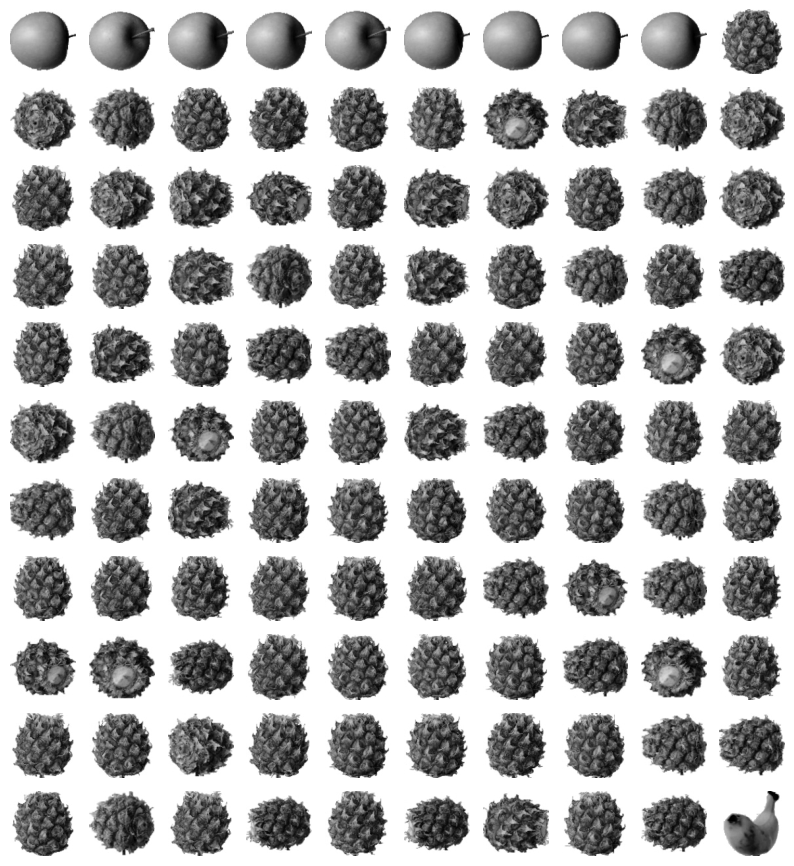

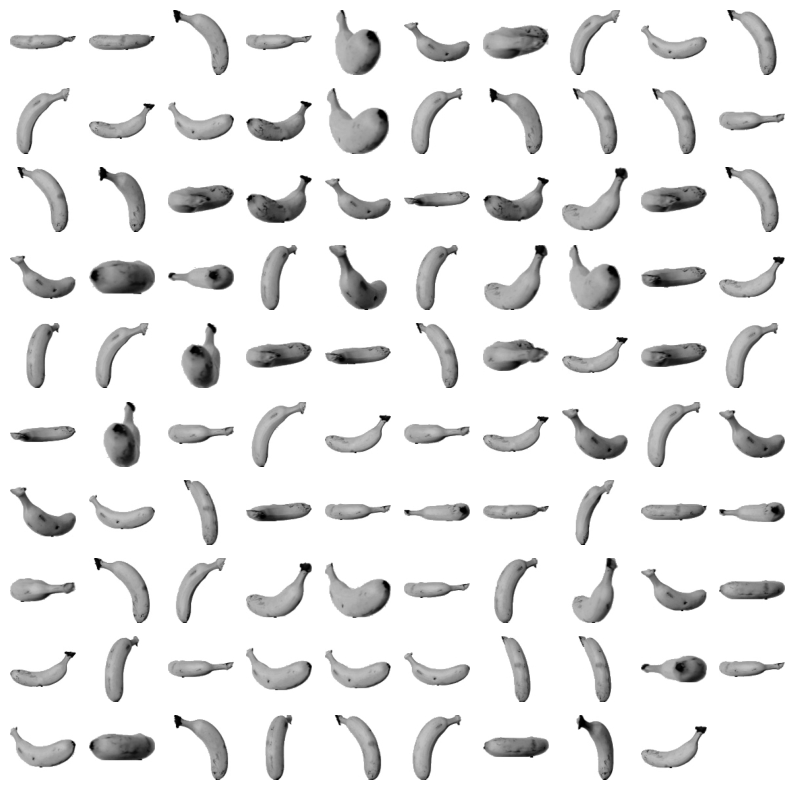

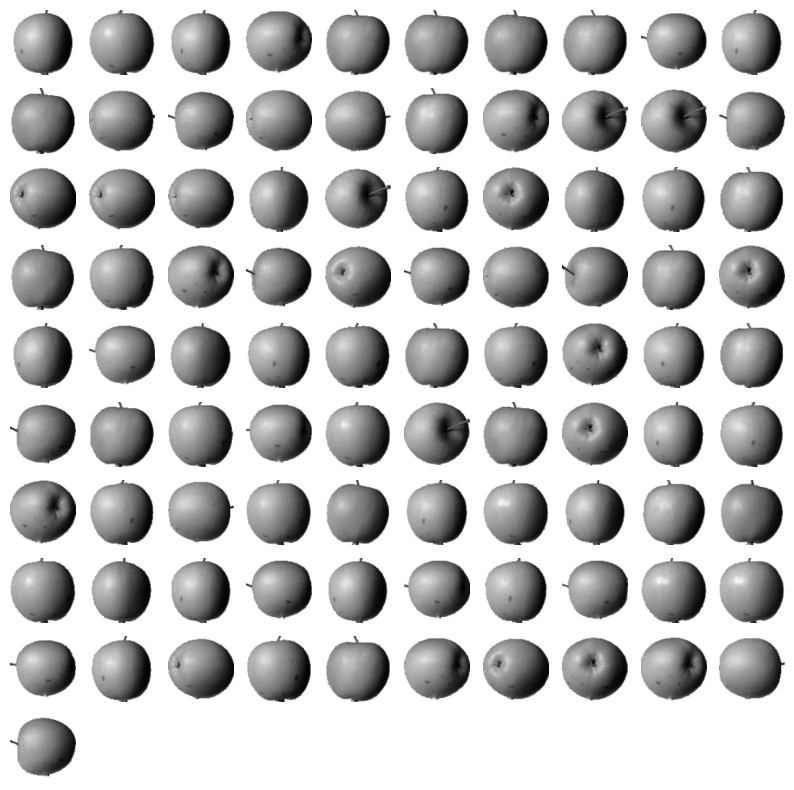

In [24]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

데이터 시각화
- 데이터를 차원축소하면 얻을 수 있는 또 다른 장점은 바로 시각화
- = 10000개의 차원은 지면에 그릴 수 없지만, 3개 이하로 차원을 줄이면 화면에 출력하기 쉬움
- 특성 2개로 줄여놓은 fruits_pca를 클러스터 별로 산점도 그려보면 -> 3개의 과일이 서로 구분 잘 되어 있음

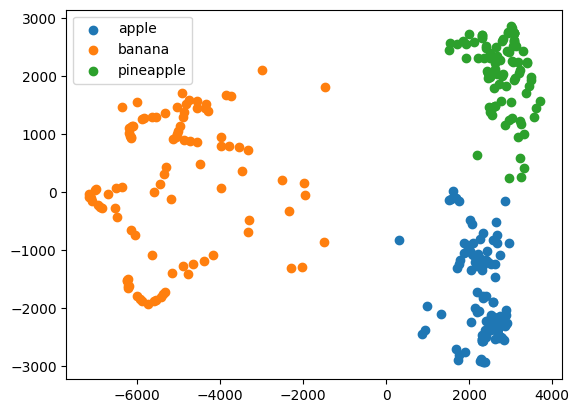

In [25]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])

plt.show()

사진의 용량을 줄이기 위해 PCA알고리즘 도입 -> 특성 10000개를 잘 설명하는 주성분 50개를 찾아냄 -> 찾아낸 주성분 50개에 투영시켜, 원본데이터의 차원을 축소시킬 수 있음(=특성 개수를 줄이니 용량이 절감됨) -> 반대로 축소된 데이터를 원본 데이터로 복원할 수도 있었음 -> 뽑아낸 주성분들이 원본 데이터를 얼마나 설명하는지도 구해볼 수 있음 -> 다른 알고리즘과 연계하여 많이 활용되고, 시각화가 용이하다는 장점도 있다.